In [1]:
# import some libraries

import pandas as pd
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import OrderedDict
from matplotlib import cm
from scipy.interpolate import griddata
from scipy.optimize import curve_fit


#import matplotlib.axes as mplaxel

# import apollo
from dolomites import apollo

# set font size for figures
mpl.rcParams.update({'font.size': 14})
cmaps = OrderedDict()

imported apollo (rev 26 March 2022)


In [2]:
# load the data from a file
file_name = 'SynRM_data.txt'
#file_name = 'PMA_SynRM_FEMM_data.txt'

data = pd.read_csv(file_name, sep='\s+', comment='#', 
                   names=["theta_m", "i_d", "i_q", "lambda_d", "lambda_q", "torque"])

#create maps
mot = apollo.fm(data)
mot.create_maps()

created maps for theta_m = 0


In [3]:
# compute the apparent inductances mot.Ld and mot.Lq
mot.calc_apparent_inductances()

# compute the incremental inductances mot.ldd, mot.ldq, mot.lqd, mot.lqd, mot.lqq, mot.lsigma, mot.ldelta
mot.calc_incremental_inductances(method = 'gradient')

# Compute the mtpa trajectory
mot.calc_MTPA(method = "analytical")

# compute saliency mot.xi and estimation error mot.epsilon
mot.calc_saliency()
mot.calc_sensored_error()

# set the MTPA as reference trajectory
mot.i_d_REF = mot.i_d_MTPA
mot.i_q_REF = mot.i_q_MTPA

# compute sensored trajectory t1
mot.calc_sensored_trajectory()

# compute convergence region
Uh=40
fh=1000
mot.calc_convergence_region(Uh, fh)

# compute the inverse inductances
mot.calc_inverse_incremental_inductances() # mot.gamma_dq, mot.gamma_delta

computed apparent inductances
computed incremental inductances using gradient
auto-detected MTPA quadrant using SynRM convention
computed MTPA on quadrant 1 using analytical
computed saliency
computed sensored error using SynRM convention
computed sensored trajectory
computed convergence region
computed inverse incremental inductances


I= 3
Gamma_delta a0= -8.2038 a1= -0.1177 b1= -0.0000 a2= 8.0378 b2= 0.0060
Gamma_dq a0= -0.0114 a1= -0.0003 b1= -0.0004 a2= -0.0087 b2= 2.7130


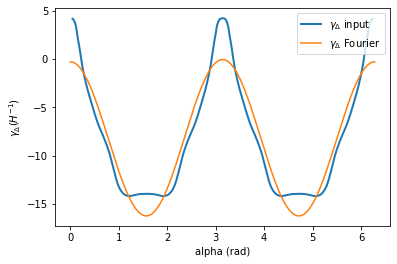

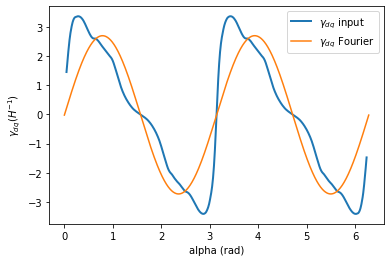

computed Ihq_fourier using REL convention


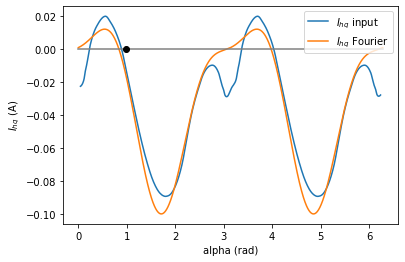

I= 3
Gamma_delta a0= -8.1733 a1= -0.0568 b1= -0.0000 a2= 8.0986 b2= 0.0060 a3= -0.0567 b3= -0.0001 a4= 2.3113 b4= -0.0001 a5= -0.0566 b5= -0.0001
Gamma_dq a0= -0.0114 a1= -0.0002 b1= -0.0003 a2= -0.0087 b2= 2.7132 a3= -0.0002 b3= -0.0009 a4= 0.0036 b4= 1.2513 a5= -0.0002 b5= -0.0017


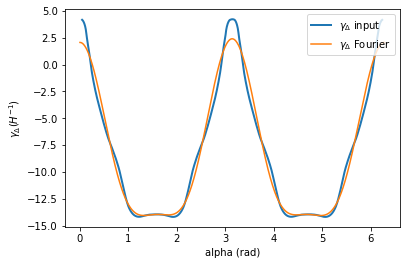

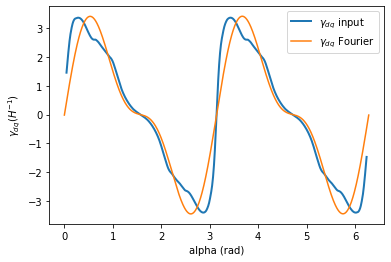

computed Ihq_fourier using REL convention


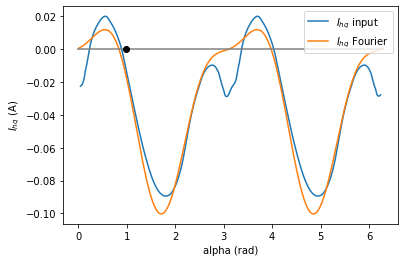

In [4]:
## compute the Fourier coefficients of the inverse incremental inductances gamma_delta and gamma_dq in polar coordinates and 
## reconstruct the Ihq signal for a current amplitude I=3A with different harmonic order k.

# for k=2
mot.calc_fourier_inverse_inductances(I=3,plot=True)
# for k=5
mot.calc_fourier_inverse_inductances(I=3,k=5,plot=True)

I= 0.5
Gamma_delta a0= -6.2362 a1= 0.0419 b1= -0.0020 a2= 6.1462 b2= -0.0024
Gamma_dq a0= 0.0023 a1= 0.0000 b1= 0.0001 a2= 0.0082 b2= 0.0954


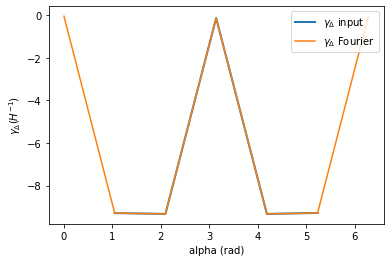

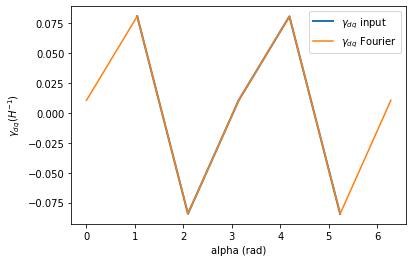

computed Ihq_fourier using REL convention


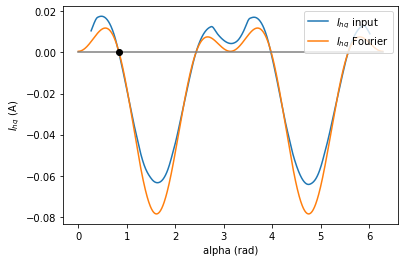

I= 5
Gamma_delta a0= -4.2699 a1= 0.0000 b1= 0.0000 a2= 12.3204 b2= -0.0014
Gamma_dq a0= -0.0280 a1= -0.0000 b1= -0.0000 a2= -0.0370 b2= 4.0430


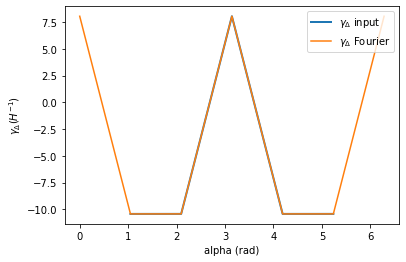

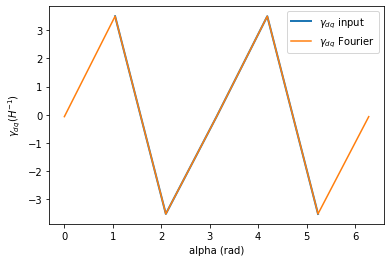

computed Ihq_fourier using REL convention


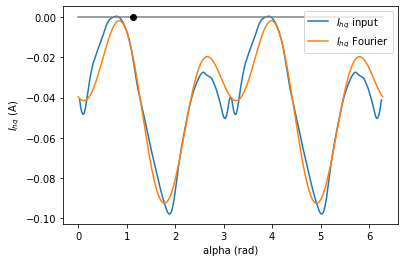

I= 0.5
Gamma_delta a0= -6.9107 a1= -0.4736 b1= 0.0039 a2= 4.2099 b2= -0.0068
Gamma_dq a0= -0.0009 a1= -0.0013 b1= 0.0011 a2= 0.0026 b2= 0.1011


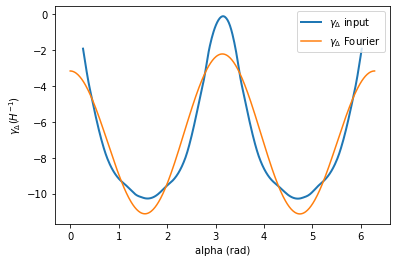

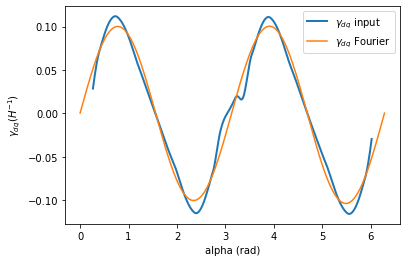

computed Ihq_fourier using REL convention


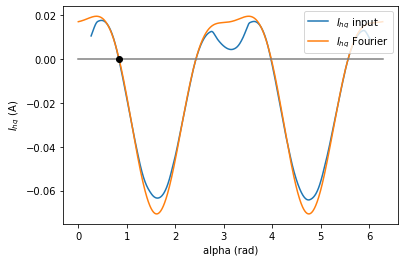

I= 5
Gamma_delta a0= -4.7666 a1= -0.0116 b1= 0.0000 a2= 11.8467 b2= 0.0000
Gamma_dq a0= -0.0177 a1= 0.0004 b1= -0.0000 a2= -0.0147 b2= 4.5995


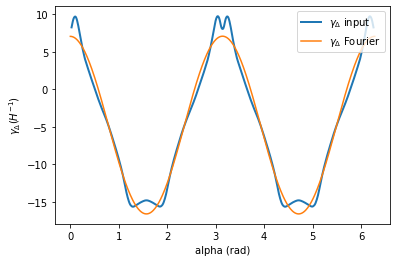

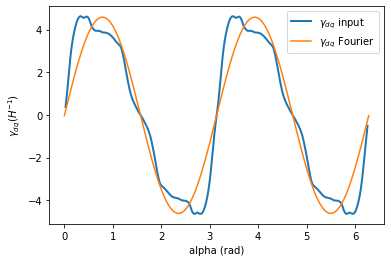

computed Ihq_fourier using REL convention


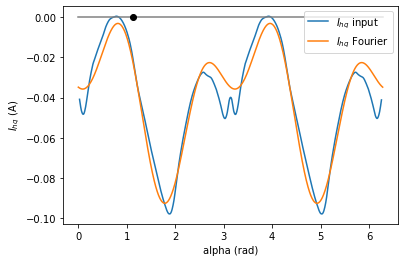

In [8]:
## compute the Fourier coefficients of the inverse incremental inductances gamma_delta and gamma_dq in polar coordinates for 
## two different breakpoints numbers and current amplitudes and reconstruct the Ihq signal. The curves are aprroximately equal 

# N=7
mot.calc_fourier_inverse_inductances(I=0.5,steps=7,plot=True)
mot.calc_fourier_inverse_inductances(I=5,steps=7,plot=True)
# N=500
mot.calc_fourier_inverse_inductances(I=0.5,steps=500,plot=True)
mot.calc_fourier_inverse_inductances(I=5,steps=500,plot=True)  

I= 0.5
Gamma_delta a0= -6.9134 a1= -0.4790 b1= 0.0038 a2= 4.2049 b2= -0.0068
Gamma_dq a0= -0.0009 a1= -0.0013 b1= 0.0011 a2= 0.0026 b2= 0.1011


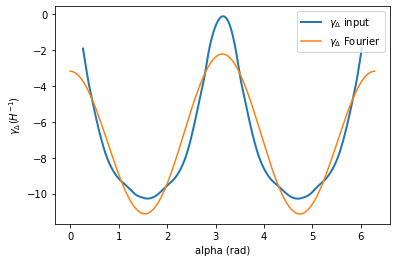

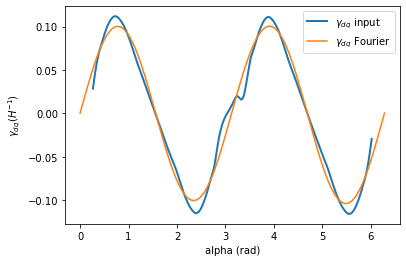

computed Ihq_fourier using REL convention


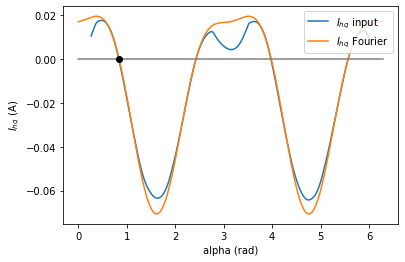

I= 0.5
computed Ihq_fourier_2meas using REL convention


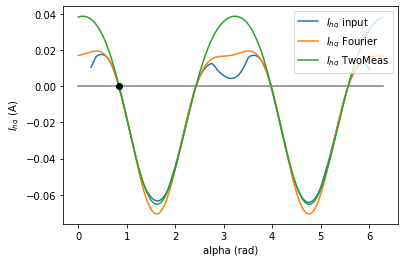

I= 1.0
Gamma_delta a0= -10.0198 a1= -0.4945 b1= -0.0003 a2= 3.8034 b2= -0.0146
Gamma_dq a0= 0.0004 a1= -0.0006 b1= 0.0008 a2= 0.0011 b2= 0.3406


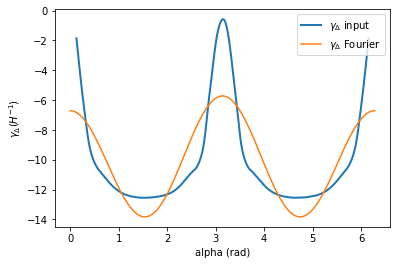

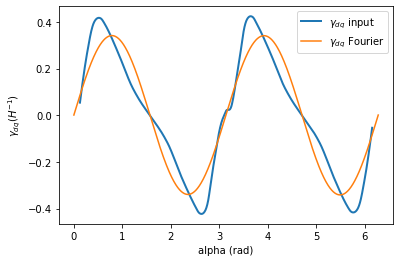

computed Ihq_fourier using REL convention


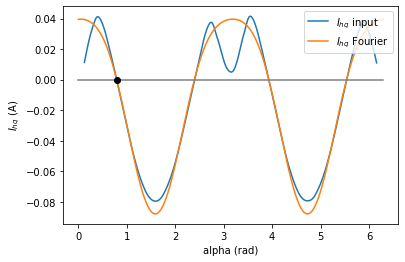

I= 1.0
computed Ihq_fourier_2meas using REL convention


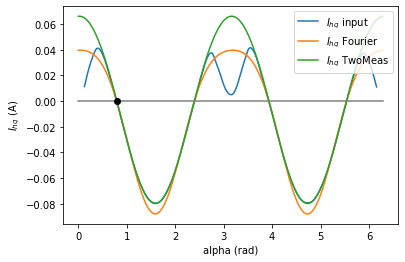

I= 1.5
Gamma_delta a0= -10.7919 a1= -0.3387 b1= -0.0007 a2= 3.6195 b2= 0.0000
Gamma_dq a0= -0.0011 a1= -0.0001 b1= 0.0001 a2= -0.0002 b2= 0.7443


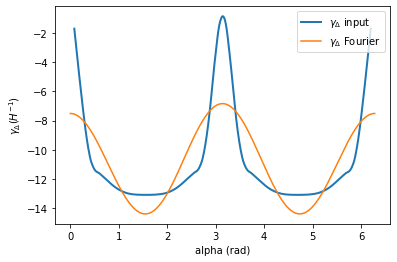

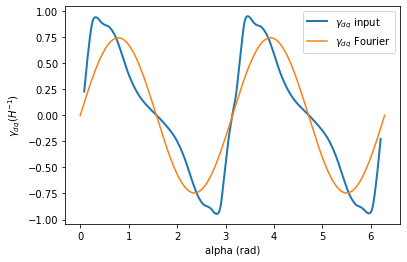

computed Ihq_fourier using REL convention


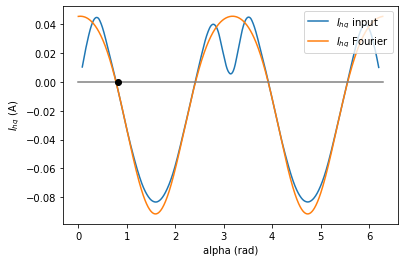

I= 1.5
computed Ihq_fourier_2meas using REL convention


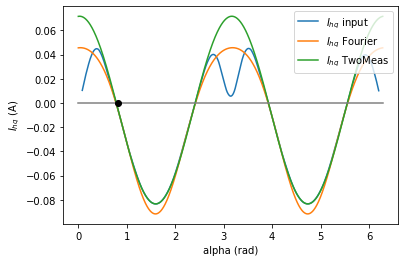

I= 2.0
Gamma_delta a0= -10.1571 a1= -0.2452 b1= -0.0002 a2= 5.2297 b2= 0.0038
Gamma_dq a0= 0.0029 a1= -0.0025 b1= -0.0003 a2= 0.0063 b2= 1.3119


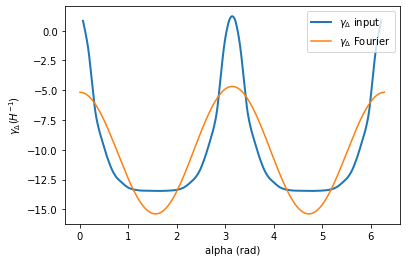

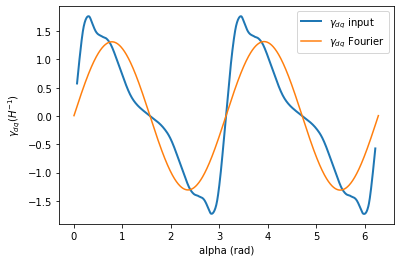

computed Ihq_fourier using REL convention


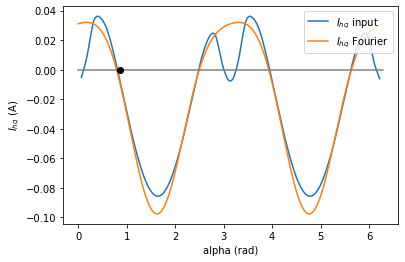

I= 2.0
computed Ihq_fourier_2meas using REL convention


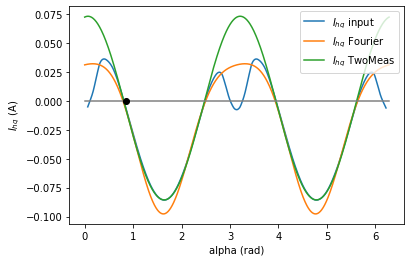

I= 2.5
Gamma_delta a0= -9.2182 a1= -0.1584 b1= -0.0000 a2= 6.7123 b2= 0.0055
Gamma_dq a0= -0.0042 a1= -0.0019 b1= -0.0006 a2= -0.0008 b2= 2.0430


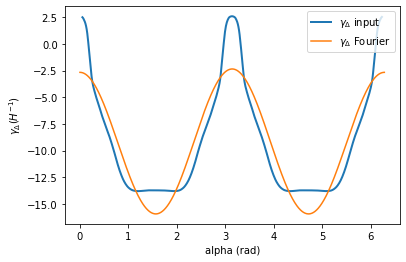

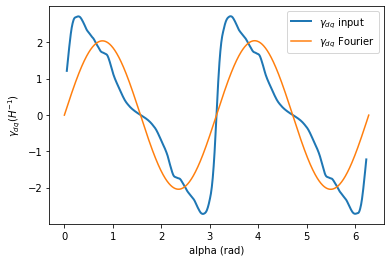

computed Ihq_fourier using REL convention


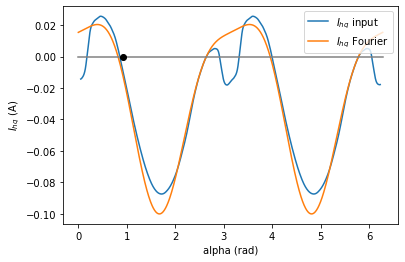

I= 2.5
computed Ihq_fourier_2meas using REL convention


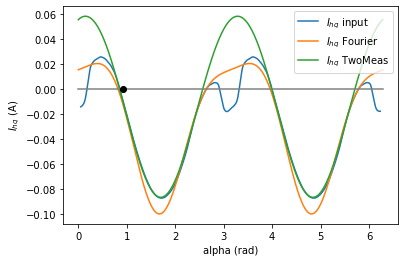

I= 3.0
Gamma_delta a0= -8.2038 a1= -0.1177 b1= -0.0000 a2= 8.0378 b2= 0.0060
Gamma_dq a0= -0.0114 a1= -0.0003 b1= -0.0004 a2= -0.0087 b2= 2.7130


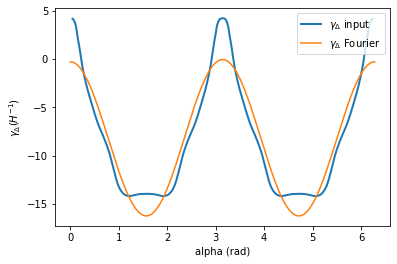

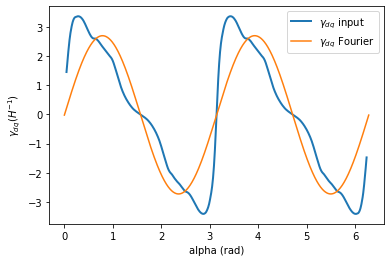

computed Ihq_fourier using REL convention


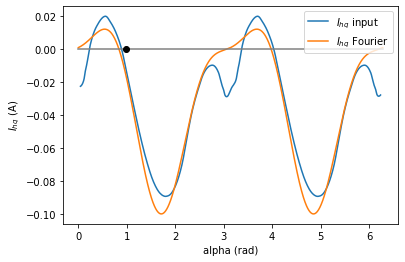

I= 3.0
computed Ihq_fourier_2meas using REL convention


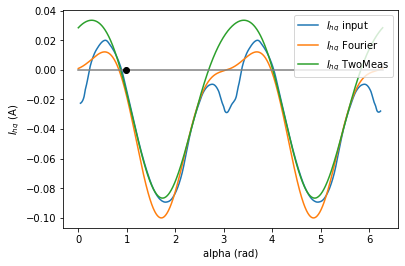

I= 3.5
Gamma_delta a0= -7.2509 a1= -0.0608 b1= 0.0000 a2= 9.0934 b2= 0.0008
Gamma_dq a0= -0.0160 a1= 0.0002 b1= -0.0002 a2= -0.0138 b2= 3.2570


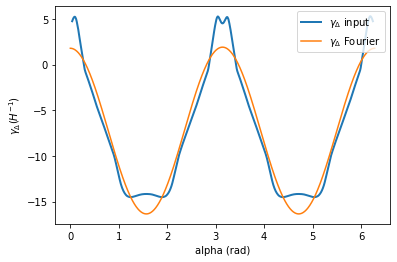

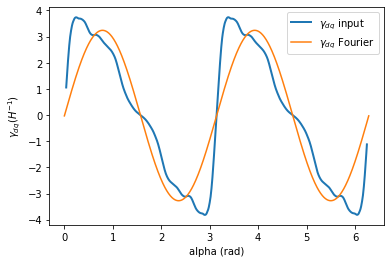

computed Ihq_fourier using REL convention


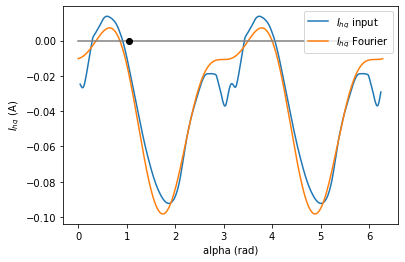

I= 3.5
computed Ihq_fourier_2meas using REL convention


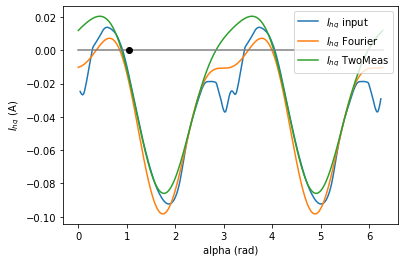

I= 4.0
Gamma_delta a0= -6.4383 a1= -0.0330 b1= -0.0000 a2= 9.9104 b2= 0.0043
Gamma_dq a0= -0.0162 a1= 0.0003 b1= -0.0001 a2= -0.0103 b2= 3.7392


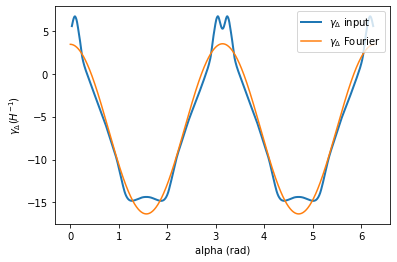

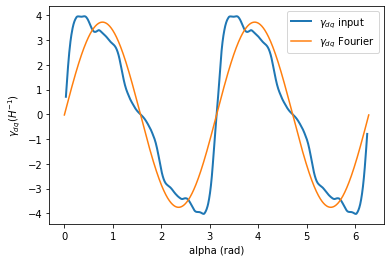

computed Ihq_fourier using REL convention


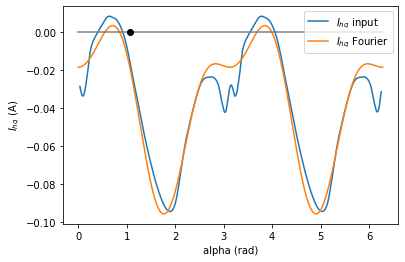

I= 4.0
computed Ihq_fourier_2meas using REL convention


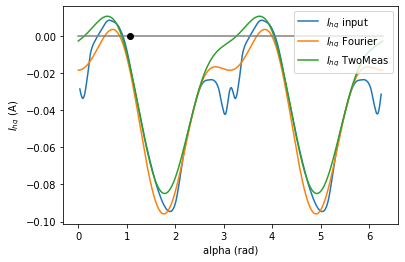

I= 4.5
Gamma_delta a0= -5.5863 a1= -0.0236 b1= -0.0000 a2= 10.8526 b2= 0.0047
Gamma_dq a0= -0.0209 a1= 0.0002 b1= -0.0001 a2= -0.0142 b2= 4.1594


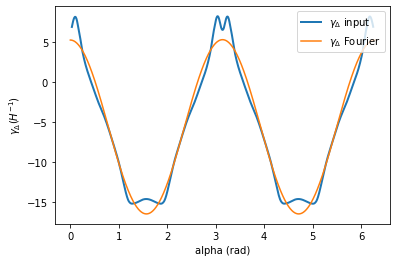

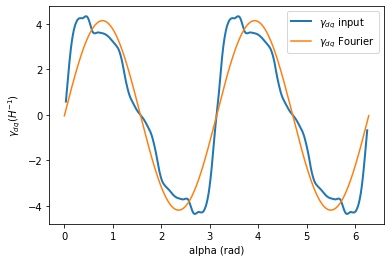

computed Ihq_fourier using REL convention


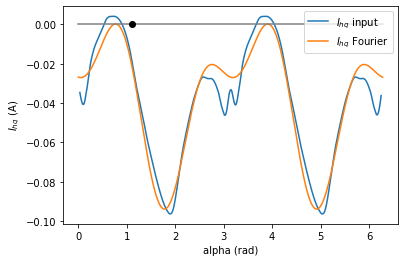

I= 4.5
computed Ihq_fourier_2meas using REL convention


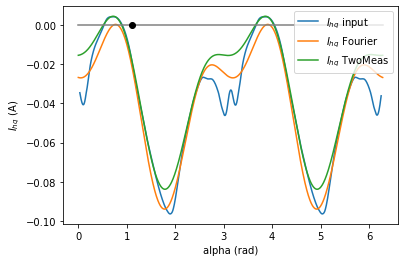

I= 5.0
Gamma_delta a0= -4.7677 a1= -0.0138 b1= 0.0000 a2= 11.8444 b2= 0.0000
Gamma_dq a0= -0.0177 a1= 0.0005 b1= -0.0000 a2= -0.0146 b2= 4.5995


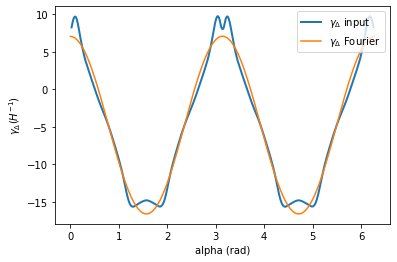

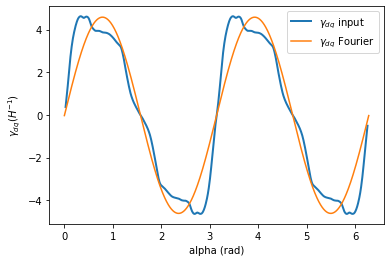

computed Ihq_fourier using REL convention


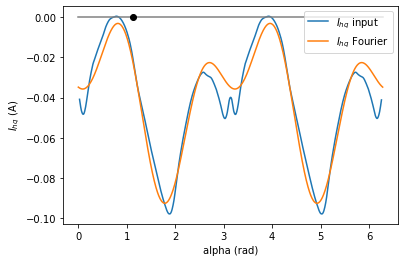

I= 5.0
computed Ihq_fourier_2meas using REL convention


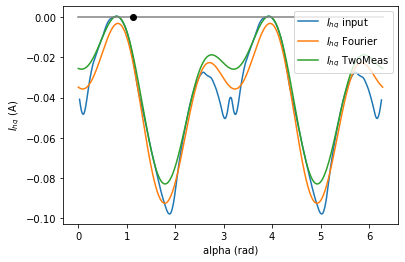

I= 5.5
Gamma_delta a0= -3.9114 a1= -0.0142 b1= -0.0000 a2= 12.9315 b2= 0.0118
Gamma_dq a0= -0.0263 a1= 0.0008 b1= 0.0000 a2= -0.0159 b2= 5.0678


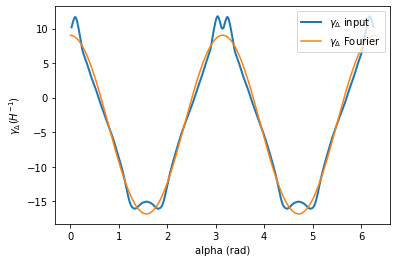

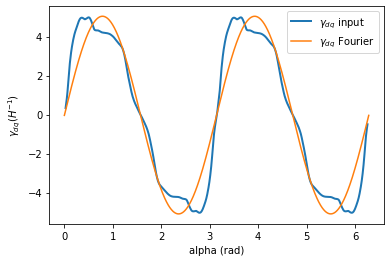

computed Ihq_fourier using REL convention


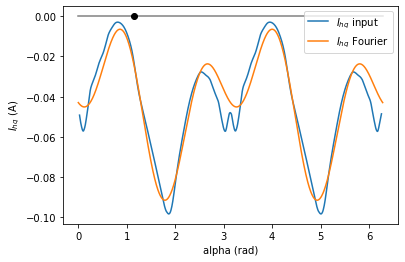

I= 5.5
computed Ihq_fourier_2meas using REL convention


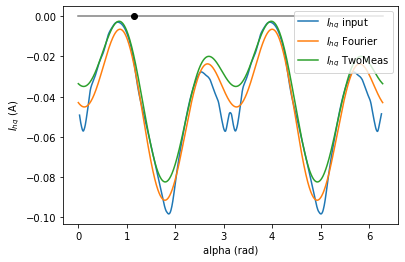

I= 6.0
Gamma_delta a0= -3.0129 a1= -0.0133 b1= -0.0000 a2= 14.0979 b2= -0.0097
Gamma_dq a0= -0.0417 a1= 0.0005 b1= -0.0000 a2= -0.0420 b2= 5.5380


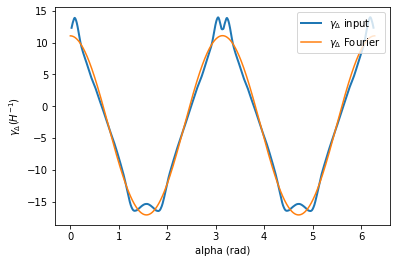

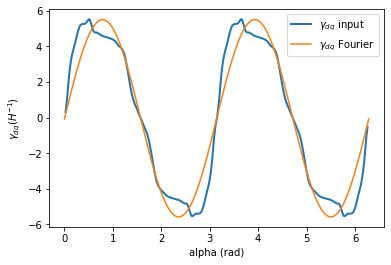

computed Ihq_fourier using REL convention


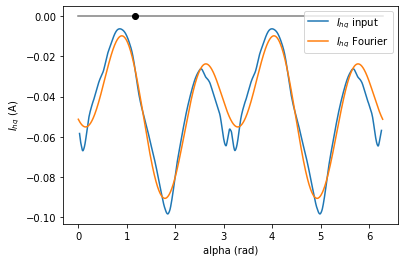

I= 6.0
computed Ihq_fourier_2meas using REL convention


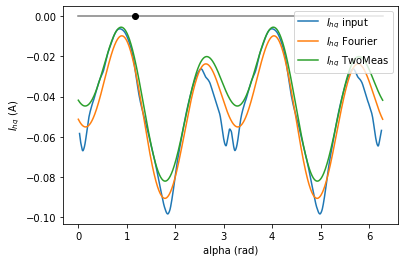

In [10]:
## compute the Fourier coefficients of the inverse incremental inductances gamma_delta and gamma_dq in polar coordinates and 
## reconstruct the Ihq signal for different current amplitudes (In=6A). 
## Calculates the reconstructed Ihq signal with only two gamma_delta and gamma_dq measurements for different current amplitude

I_vector = np.linspace(0.5,6,num=12)  # for file_name = 'SynRM_data.txt' and file_name = 'PMA_SynRM_FEMM_data.txt'

for i in I_vector:
    mot.calc_fourier_inverse_inductances(I=i,plot=True)
    mot.calc_Ihq_few_points(I=i,plot=True)


I= 0.5
Gamma_delta a0= -6.9134 a1= -0.4790 b1= 0.0038 a2= 4.2049 b2= -0.0068
Gamma_dq a0= -0.0009 a1= -0.0013 b1= 0.0011 a2= 0.0026 b2= 0.1011
computed Ihq_fourier using REL convention
I= 0.5
computed Ihq_fourier_2meas using REL convention
I= 1.0
Gamma_delta a0= -10.0198 a1= -0.4945 b1= -0.0003 a2= 3.8034 b2= -0.0146
Gamma_dq a0= 0.0004 a1= -0.0006 b1= 0.0008 a2= 0.0011 b2= 0.3406
computed Ihq_fourier using REL convention
I= 1.0
computed Ihq_fourier_2meas using REL convention
I= 1.5
Gamma_delta a0= -10.7919 a1= -0.3387 b1= -0.0007 a2= 3.6195 b2= 0.0000
Gamma_dq a0= -0.0011 a1= -0.0001 b1= 0.0001 a2= -0.0002 b2= 0.7443
computed Ihq_fourier using REL convention
I= 1.5
computed Ihq_fourier_2meas using REL convention
I= 2.0
Gamma_delta a0= -10.1571 a1= -0.2452 b1= -0.0002 a2= 5.2297 b2= 0.0038
Gamma_dq a0= 0.0029 a1= -0.0025 b1= -0.0003 a2= 0.0063 b2= 1.3119
computed Ihq_fourier using REL convention
I= 2.0
computed Ihq_fourier_2meas using REL convention
I= 2.5
Gamma_delta a0= -9.2182 a1= -

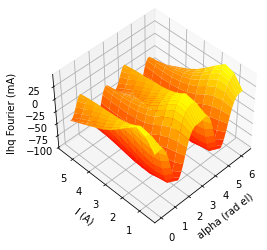

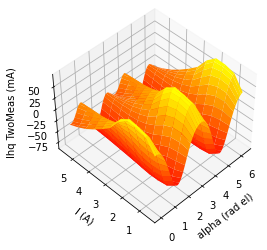

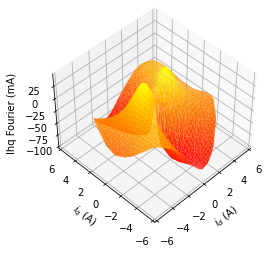

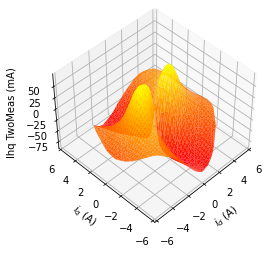

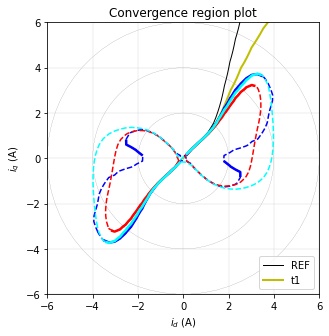

In [11]:
## Compute convergence region

I_vector = np.arange(start=0.5, stop=6, step=0.5)

## set the angle steps for calc_fourier_inverse_inductances
steps = 1000

Ihq_fourier = np.zeros((steps, I_vector.size))
Ihq_pp = np.zeros((steps, I_vector.size))
row_index = 0
for index in range(I_vector.size):
    mot.calc_fourier_inverse_inductances(I=I_vector[index], steps=steps)
    mot.calc_Ihq_few_points(I=I_vector[index], steps=steps)
    Ihq_fourier[:,index] = mot.Ihq_fourier
    Ihq_pp[:,index] = mot.Ihq_fourier_2meas
    row_index = row_index + 1

######## 3d plot in polar coordinates ########
alpha_array, I_array = np.meshgrid(mot.alpha_breakpoints, I_vector)
alpha_array = alpha_array.transpose()
I_array = I_array.transpose()

#plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_array, I_array, Ihq_fourier*1000,cmap = 'autumn')
ax.view_init(elev=45, azim=-135)
ax.set_xlabel('alpha (rad el)')
ax.set_ylabel('I (A)')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Ihq Fourier (mA)', rotation=90)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_array, I_array, Ihq_pp*1000,cmap='autumn')
ax.view_init(elev=45, azim=-135)
ax.set_xlabel('alpha (rad el)')
ax.set_ylabel('I (A)')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Ihq TwoMeas (mA)', rotation=90)
plt.show()

## convert Ihq_fourier from polar to cartesian
# start with the grid
id_array = I_array*np.cos(alpha_array)
iq_array = I_array*np.sin(alpha_array)

# convert two-dimensional vector into one-dimensional 
id_array_flatten = id_array.flatten()
iq_array_flatten = iq_array.flatten()
Ihq_fourier_flatten = Ihq_fourier.flatten()
Ihq_pp_flatten = Ihq_pp.flatten()

# remove NaN
NaN_mask = ~np.isnan(Ihq_fourier_flatten) 
id_array_flatten_NaN = id_array_flatten[NaN_mask] 
iq_array_flatten_NaN = iq_array_flatten[NaN_mask]
Ihq_fourier_flatten = Ihq_fourier_flatten[NaN_mask]
points_I = np.vstack((id_array_flatten_NaN, iq_array_flatten_NaN)).T

# remove NaN
NaN_mask = ~np.isnan(Ihq_pp_flatten) 
id_array_flatten_pp = id_array_flatten[NaN_mask] 
iq_array_flatten_pp = iq_array_flatten[NaN_mask]
Ihq_pp_flatten = Ihq_pp_flatten[NaN_mask]
points_I_pp = np.vstack((id_array_flatten_pp, iq_array_flatten_pp)).T

# compute griddata on the original mot.i_d mot.i_q grid
Ihq_Fourier_dq = griddata(points_I, Ihq_fourier_flatten, (mot.i_d, mot.i_q), method='cubic')
Ihq_pp_dq = griddata(points_I_pp, Ihq_pp_flatten, (mot.i_d, mot.i_q), method='cubic')

## plot 3d Ihq_Fourier_dq
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Convert to one dimensional arrays for plot
i_d_vec = mot.i_d.flatten()
i_q_vec = mot.i_q.flatten()
Ihq_Fourier_dq_vec = Ihq_Fourier_dq.flatten()
# Remove NaNs for plot
NaN_mask = ~np.isnan(Ihq_Fourier_dq_vec) # indices of the non-NaNs
i_d_vec = i_d_vec[NaN_mask] # apply mask to keep the non-NaNs, i.e. remove NaNs
i_q_vec = i_q_vec[NaN_mask]
Ihq_Fourier_dq_vec = Ihq_Fourier_dq_vec[NaN_mask]
ax.plot_trisurf(i_d_vec, i_q_vec, Ihq_Fourier_dq_vec*1000, cmap='autumn')
ax.view_init(elev=45, azim=-135)
ax.set_xlabel('$i_d$ (A)')
ax.set_ylabel('$i_q$ (A)')
ax.zaxis.set_rotate_label(False)
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlabel('Ihq Fourier (mA)', rotation=90)
plt.show()

## plot 3d Ihq_fourier_2meas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Convert to one dimensional arrays for plot
i_d_vec = mot.i_d.flatten()
i_q_vec = mot.i_q.flatten()
Ihq_pp_dq_vec = Ihq_pp_dq.flatten()
# Remove NaNs for plot
NaN_mask = ~np.isnan(Ihq_pp_dq_vec) # indices of the non-NaNs
i_d_vec = i_d_vec[NaN_mask] # apply mask to keep the non-NaNs, i.e. remove NaNs
i_q_vec = i_q_vec[NaN_mask]
Ihq_pp_dq_vec = Ihq_pp_dq_vec[NaN_mask]
ax.plot_trisurf(i_d_vec, i_q_vec, Ihq_pp_dq_vec*1000, cmap='autumn')
ax.view_init(elev=45, azim=-135)
ax.set_xlabel('$i_d$ (A)')
ax.set_ylabel('$i_q$ (A)')
ax.zaxis.set_rotate_label(False)
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlabel('Ihq TwoMeas (mA)', rotation=90)
plt.show()


## FINAL STEP: FIND Ihq=0 WITH NEGATIVE SLOPE (convergence region computation)

# calc Ihq_dt, tangential derivative (with respect to angle) of Ihq
Ihq_dx = np.gradient(Ihq_Fourier_dq, mot.i_d[:,0], axis=0)
Ihq_dy = np.gradient(Ihq_Fourier_dq, mot.i_q[0,:], axis=1)
Ihq_d_alpha_ie_Fourier = - Ihq_dx * mot.i_q + Ihq_dy * mot.i_d

# calc Ihq_dt, tangential derivative (with respect to angle) of Ihq
Ihq_pp_dx = np.gradient(Ihq_pp_dq, mot.i_d[:,0], axis=0)
Ihq_pp_dy = np.gradient(Ihq_pp_dq, mot.i_q[0,:], axis=1)
Ihq_d_alpha_ie_pp = - Ihq_pp_dx * mot.i_q + Ihq_pp_dy * mot.i_d

## extract Ihq locus with negative slope
Ihq_neg_Fourier = copy.deepcopy(Ihq_Fourier_dq)
Ihq_neg_Fourier[Ihq_d_alpha_ie_Fourier > 0] = np.nan

## extract Ihq locus with negative slope
Ihq_neg_pp = copy.deepcopy(Ihq_pp_dq)
Ihq_neg_pp[Ihq_d_alpha_ie_pp > 0] = np.nan



# legend
# black: reference trajectory REF
# yellow: sensored trajectory t1
# blue: sensorless t2: continuous where Ihq=0 with negative slope (convergence region) and dashed where Ihq=0 with positive slope
# red: Fourier t2': continuous where Ihq=0 with negative slope (convergence region) and dashed where Ihq=0 with positive slope
# red: TwoMeas t2'': continuous where Ihq=0 with negative slope (convergence region) and dashed where Ihq=0 with positive slope
fig, ax = plt.subplots(figsize=(5,5))
circle2 = plt.Circle((0, 0), 2, fill=False, linewidth=0.1)
circle4 = plt.Circle((0, 0), 4, fill=False, linewidth=0.1)
circle6 = plt.Circle((0, 0), 6, fill=False, linewidth=0.1)
ax.add_artist(circle2)
ax.add_artist(circle4)
ax.add_artist(circle6)
ax.plot(mot.i_d_REF, mot.i_q_REF, 'k', label='REF',linewidth=1.0)
ax.plot(mot.i_d_sensored, mot.i_q_sensored, 'y', label='t1',linewidth=2.0)
ax.contour(mot.i_d, mot.i_q, mot.Ihq, levels=[0], colors='b', linestyles='dashed')
ax.contour(mot.i_d, mot.i_q, mot.Ihq_neg, levels=[0], colors='b',linewidths=2.5)
ax.contour(mot.i_d, mot.i_q, Ihq_Fourier_dq, levels=[0], colors='red', linestyles='dashed')
ax.contour(mot.i_d, mot.i_q, Ihq_neg_Fourier, levels=[0], colors='red',linewidths=2.5)
ax.contour(mot.i_d, mot.i_q, Ihq_pp_dq, levels=[0], colors='cyan', linestyles='dashed')
ax.contour(mot.i_d, mot.i_q, Ihq_neg_pp, levels=[0], colors='cyan',linewidths=2.5)
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_aspect('equal')
plt.title('Convergence region plot')
plt.legend(loc="lower right")
plt.grid(linewidth=0.2)
plt.show()


I= 0.5
Gamma_delta a0= -6.9134 a1= -0.4790 b1= 0.0038 a2= 4.2049 b2= -0.0068
Gamma_dq a0= -0.0009 a1= -0.0013 b1= 0.0011 a2= 0.0026 b2= 0.1011
computed Ihq_fourier using REL convention
I= 1.0
Gamma_delta a0= -10.0198 a1= -0.4945 b1= -0.0003 a2= 3.8034 b2= -0.0146
Gamma_dq a0= 0.0004 a1= -0.0006 b1= 0.0008 a2= 0.0011 b2= 0.3406
computed Ihq_fourier using REL convention
I= 1.5
Gamma_delta a0= -10.7919 a1= -0.3387 b1= -0.0007 a2= 3.6195 b2= 0.0000
Gamma_dq a0= -0.0011 a1= -0.0001 b1= 0.0001 a2= -0.0002 b2= 0.7443
computed Ihq_fourier using REL convention
I= 2.0
Gamma_delta a0= -10.1571 a1= -0.2452 b1= -0.0002 a2= 5.2297 b2= 0.0038
Gamma_dq a0= 0.0029 a1= -0.0025 b1= -0.0003 a2= 0.0063 b2= 1.3119
computed Ihq_fourier using REL convention
I= 2.5
Gamma_delta a0= -9.2182 a1= -0.1584 b1= -0.0000 a2= 6.7123 b2= 0.0055
Gamma_dq a0= -0.0042 a1= -0.0019 b1= -0.0006 a2= -0.0008 b2= 2.0430
computed Ihq_fourier using REL convention
I= 3.0
Gamma_delta a0= -8.2038 a1= -0.1177 b1= -0.0000 a2= 8.0378 b2=

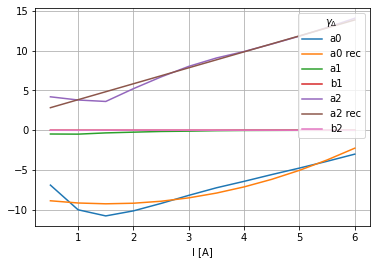

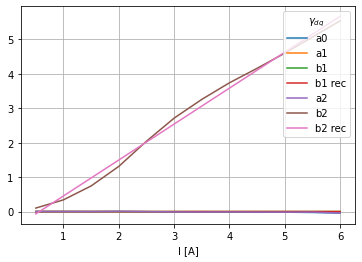

In [12]:
## compute the Fourier coefficients of gamma_delta and gamma_dq recustruction with respect to the variation 
## of the current amplitude I 

# compute the Fourier coefficients
I_vector = np.arange(start=0.5, stop=6.5, step=0.5)

a0delta=np.zeros(len(I_vector))
a1delta=np.zeros(len(I_vector))
b1delta=np.zeros(len(I_vector))
a2delta=np.zeros(len(I_vector))
b2delta=np.zeros(len(I_vector))
a0dq=np.zeros(len(I_vector))
a1dq=np.zeros(len(I_vector))
b1dq=np.zeros(len(I_vector))
a2dq=np.zeros(len(I_vector))
b2dq=np.zeros(len(I_vector))

for p in I_vector :
    mot.calc_fourier_inverse_inductances(I=p)
    a0delta[np.where(I_vector==p)]= mot.gamma_delta_fourier_coef[0]
    a1delta[np.where(I_vector==p)]= mot.gamma_delta_fourier_coef[1]
    b1delta[np.where(I_vector==p)]= mot.gamma_delta_fourier_coef[2]
    a2delta[np.where(I_vector==p)]= mot.gamma_delta_fourier_coef[3]
    b2delta[np.where(I_vector==p)]= mot.gamma_delta_fourier_coef[4]
    a0dq[np.where(I_vector==p)]= mot.gamma_dq_fourier_coef[0]
    a1dq[np.where(I_vector==p)]= mot.gamma_dq_fourier_coef[1]
    b1dq[np.where(I_vector==p)]= mot.gamma_dq_fourier_coef[2]
    a2dq[np.where(I_vector==p)]= mot.gamma_dq_fourier_coef[3]
    b2dq[np.where(I_vector==p)]= mot.gamma_dq_fourier_coef[4]
    
#  compute the reconstruction
# a0_delta can be estimated with a second-order polinomial approximation
def f(x,a,b,c):
    return a*np.square(x)+b*x+c
coeaf_a0delta_rec, pcov1 = curve_fit(f, I_vector, a0delta,maxfev=2000)
a0delta_rec=coeaf_a0delta_rec[0]*np.square(I_vector)+coeaf_a0delta_rec[1]*I_vector+coeaf_a0delta_rec[2]
# a2_delta, b2_dq and b1_dq can be estimated with a linear approximation
def g(x, m, q):
    return m*x+q
coef_a2delta_rec, pcov1 = curve_fit(g, I_vector, a2delta,maxfev=2000)
a2delta_rec=coef_a2delta_rec[0]*I_vector +coef_a2delta_rec[1]
coef_b2dq_rec, pcov1 = curve_fit(g, I_vector, b2dq,maxfev=2000)
b2dq_rec=coef_b2dq_rec[0]*I_vector +coef_b2dq_rec[1]
# only for PMA-SynRM
coef_b1dq_rec, pcov1 = curve_fit(g, I_vector, b1dq,maxfev=2000) 
b1dq_rec=coef_b1dq_rec[0]*I_vector +coef_b1dq_rec[1]


#plot gamma_delta coefficients and their reconstruction 
fig, ax = plt.subplots()
ax.plot(I_vector, a0delta,label="a0")
ax.plot(I_vector, a0delta_rec,label="a0 rec")
ax.plot(I_vector, a1delta,label="a1")
ax.plot(I_vector, b1delta,label="b1")
ax.plot(I_vector, a2delta,label="a2")
ax.plot(I_vector, a2delta_rec,label="a2 rec")
ax.plot(I_vector, b2delta,label="b2")
ax.set(xlabel='I [A]')
plt.legend(title='$\gamma_{\Delta}$',loc="upper right")
plt.grid()
plt.show()

#plot gamma_dq coefficients and their reconstruction
fig, ax = plt.subplots()
ax.plot(I_vector, a0dq,label="a0")
ax.plot(I_vector, a1dq,label="a1")
ax.plot(I_vector, b1dq,label="b1")
ax.plot(I_vector, b1dq_rec,label="b1 rec")
ax.plot(I_vector, a2dq,label="a2")
ax.plot(I_vector, b2dq,label="b2")
ax.plot(I_vector, b2dq_rec,label="b2 rec")
ax.set(xlabel='I [A]')
plt.legend(title='$\gamma_{dq}$',loc="upper right")
plt.grid()
plt.show()

I= 0.5
Gamma_delta a0= -6.9134 a1= -0.4790 b1= 0.0038 a2= 4.2049 b2= -0.0068
Gamma_dq a0= -0.0009 a1= -0.0013 b1= 0.0011 a2= 0.0026 b2= 0.1011
computed Ihq_fourier using REL convention
I= 1.0
Gamma_delta a0= -10.0198 a1= -0.4945 b1= -0.0003 a2= 3.8034 b2= -0.0146
Gamma_dq a0= 0.0004 a1= -0.0006 b1= 0.0008 a2= 0.0011 b2= 0.3406
computed Ihq_fourier using REL convention
I= 1.5
Gamma_delta a0= -10.7919 a1= -0.3387 b1= -0.0007 a2= 3.6195 b2= 0.0000
Gamma_dq a0= -0.0011 a1= -0.0001 b1= 0.0001 a2= -0.0002 b2= 0.7443
computed Ihq_fourier using REL convention
I= 2.0
Gamma_delta a0= -10.1571 a1= -0.2452 b1= -0.0002 a2= 5.2297 b2= 0.0038
Gamma_dq a0= 0.0029 a1= -0.0025 b1= -0.0003 a2= 0.0063 b2= 1.3119
computed Ihq_fourier using REL convention
I= 2.5
Gamma_delta a0= -9.2182 a1= -0.1584 b1= -0.0000 a2= 6.7123 b2= 0.0055
Gamma_dq a0= -0.0042 a1= -0.0019 b1= -0.0006 a2= -0.0008 b2= 2.0430
computed Ihq_fourier using REL convention
I= 3.0
Gamma_delta a0= -8.2038 a1= -0.1177 b1= -0.0000 a2= 8.0378 b2=

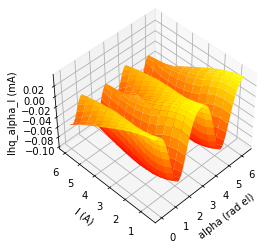

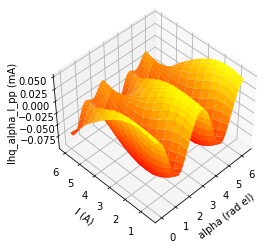

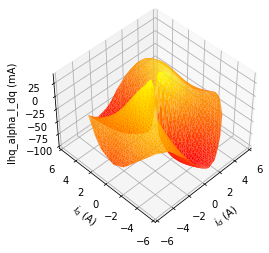

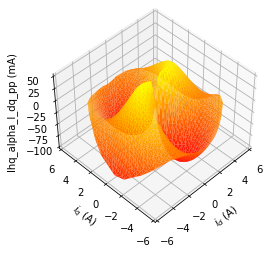

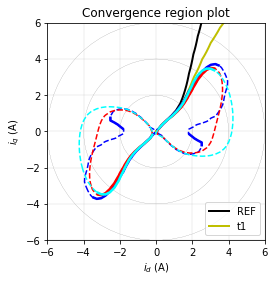

In [13]:
## Compute convergence region with function I_hq(I,alpha)

I_vector = np.arange(start=0.5, stop=6.5, step=0.5)

a0delta=np.zeros(len(I_vector))
a2delta=np.zeros(len(I_vector))
b1dq=np.zeros(len(I_vector))
b2dq=np.zeros(len(I_vector))

for p in I_vector :
    mot.calc_fourier_inverse_inductances(I=p)
    a0delta[np.where(I_vector==p)]= mot.gamma_delta_fourier_coef[0]
    a2delta[np.where(I_vector==p)]= mot.gamma_delta_fourier_coef[3]
    b1dq[np.where(I_vector==p)]= mot.gamma_dq_fourier_coef[2]
    b2dq[np.where(I_vector==p)]= mot.gamma_dq_fourier_coef[4]

# coefficients reconstruction
def f(x,b,c,d):
    return b*np.square(x)+c*x+d
def g(x, m, q):
    return m*x+q   
    
coeaf_a0delta_rec, pcov1 = curve_fit(f, I_vector, a0delta,maxfev=2000)
r=coeaf_a0delta_rec[0]
s=coeaf_a0delta_rec[1]
t=coeaf_a0delta_rec[2]
coef_a2delta_rec, pcov1 = curve_fit(g, I_vector, a2delta,maxfev=2000)
coef_b2dq_rec, pcov1 = curve_fit(g, I_vector, b2dq,maxfev=2000)
coef_b1dq_rec, pcov1 = curve_fit(g, I_vector, b1dq,maxfev=2000) 

# few points
I_pp=np.array([0.5,2.5,4.5])
a0delta_pp=np.zeros(len(I_pp))
a2delta_pp=np.zeros(len(I_pp))
b1dq_pp=np.zeros(len(I_pp))
b2dq_pp=np.zeros(len(I_pp))

theta_star = np.interp(I_vector, mot.i_MTPA, mot.theta_MTPA)
Ihq_I_alpha=np.zeros((I_vector.size,mot.alpha_breakpoints.size))


if  np.mean(mot.ldelta[~np.isnan(mot.ldelta)]) < 0:
    print('computed using REL convention')
    for i in I_pp:
        mot.calc_Ihq_few_points(I=i)
        a0delta_pp[np.where(I_pp==i)]= mot.gamma_delta_a0
        a2delta_pp[np.where(I_pp==i)]= mot.gamma_delta_a2
        b2dq_pp[np.where(I_pp==i)]= mot.gamma_dq_b2 
    coeaf_a0delta_rec_pp, pcov1 = curve_fit(f, I_pp, a0delta_pp,maxfev=2000)
    coef_a2delta_rec_pp, pcov1 = curve_fit(g, I_pp, a2delta_pp,maxfev=2000)
    coef_b2dq_rec_pp, pcov1 = curve_fit(g, I_pp, b2dq_pp,maxfev=2000)
    # define function I_hq(I,alpha)
    def fun (x,y,coeaf_a0delta,coef_a2delta,coef_b2dq):
        a2delta_fun = coef_a2delta[0]*y + coef_a2delta[1]
        b2dq_fun = coef_b2dq[0]*y + coef_b2dq[1]
        a0delta_fun = coeaf_a0delta[0]*np.square(y) + coeaf_a0delta[1]*y + coeaf_a0delta[2]  
        a = (b2dq_fun+a2delta_fun)/2
        c = a0delta_fun
        e = (-b2dq_fun+a2delta_fun)/2
        return mot.Uh/(2*math.pi*mot.fh)*(a*np.sin(-2*theta_star)+c*np.sin(2*x-2*theta_star)+e*np.sin(4*x-2*theta_star))
    # calc I_hq(I,alpha) and I_hq(I,alpha) with two measurements of gamma in three measurements of current amplitudes   
    mot.alpha_breakpoints, I_vector = np.meshgrid(mot.alpha_breakpoints, I_vector)
    mot.alpha_breakpoints = mot.alpha_breakpoints.transpose()
    I_vector = I_vector.transpose()
    Ihq_alpha_I = fun(mot.alpha_breakpoints, I_vector,coeaf_a0delta_rec,coef_a2delta_rec,coef_b2dq_rec)
    Ihq_alpha_I_pp = fun(mot.alpha_breakpoints, I_vector,coeaf_a0delta_rec_pp,coef_a2delta_rec_pp,coef_b2dq_rec_pp)     
else :
    print('computed using PMAREL convention')  
    for i in I_pp:
        mot.calc_Ihq_few_points(I=i)
        a0delta_pp[np.where(I_pp==i)]= mot.gamma_delta_a0
        a2delta_pp[np.where(I_pp==i)]= mot.gamma_delta_a2    
        b1dq_pp[np.where(I_pp==i)]= mot.gamma_dq_b1
        b2dq_pp[np.where(I_pp==i)]= mot.gamma_dq_b2  
    coeaf_a0delta_rec_pp, pcov1 = curve_fit(f, I_pp, a0delta_pp,maxfev=2000)
    coef_a2delta_rec_pp, pcov1 = curve_fit(g, I_pp, a2delta_pp,maxfev=2000)
    coef_b2dq_rec_pp, pcov1 = curve_fit(g, I_pp, b2dq_pp,maxfev=2000)
    coef_b1dq_rec_pp, pcov1 = curve_fit(g, I_pp, b1dq_pp,maxfev=2000) #only for PMA-SynRM
    # define function I_hq(I,alpha)
    def fun (x,y,coeaf_a0delta,coef_a2delta,coef_b1dq,coef_b2dq):
        a2delta_fun = coef_a2delta[0]*y + coef_a2delta[1]
        b2dq_fun = coef_b2dq[0]*y + coef_b2dq[1]
        b1dq_fun = coef_b1dq[0]*y + coef_b1dq[1]
        a0delta_fun = coeaf_a0delta[0]*np.square(y) + coeaf_a0delta[1]*y + coeaf_a0delta[2]
        a = (-b2dq_fun-a2delta_fun)/2
        b=-b1dq_fun/2
        c = -a0delta_fun
        d=-b
        e = (b2dq_fun-a2delta_fun)/2
        return mot.Uh/(2*math.pi*mot.fh)*(a*np.sin(-2*theta_star)+b*np.sin(x-2*theta_star)+c*np.sin(2*x-2*theta_star)
                                          +d*np.sin(3*x-2*theta_star)+e*np.sin(4*x-2*theta_star))
    # calc I_hq(I,alpha) and I_hq(I,alpha) with two measurements of gamma in three measurements of current amplitudes   
    mot.alpha_breakpoints, I_vector = np.meshgrid(mot.alpha_breakpoints, I_vector)
    mot.alpha_breakpoints = mot.alpha_breakpoints.transpose()
    I_vector = I_vector.transpose()
    Ihq_alpha_I = fun(mot.alpha_breakpoints, I_vector,coeaf_a0delta_rec,coef_a2delta_rec,coef_b1dq_rec,coef_b2dq_rec)
    Ihq_alpha_I_pp = fun(mot.alpha_breakpoints, I_vector,coeaf_a0delta_rec_pp,coef_a2delta_rec_pp,coef_b1dq_rec_pp,coef_b2dq_rec_pp)

#plot Ihq_alpha_I in polar coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(mot.alpha_breakpoints, I_vector, Ihq_alpha_I,cmap = 'autumn')
ax.view_init(elev=45, azim=-135)
ax.set_xlabel('alpha (rad el)')
ax.set_ylabel('I (A)')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Ihq_alpha_I (mA)', rotation=90)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(mot.alpha_breakpoints, I_vector, Ihq_alpha_I_pp,cmap = 'autumn')
ax.view_init(elev=45, azim=-135)
ax.set_xlabel('alpha (rad el)')
ax.set_ylabel('I (A)')
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Ihq_alpha_I_pp (mA)', rotation=90)
plt.show()

## convert Ihq_fourier from polar to cartesian
# start with the grid
id_array = I_vector*np.cos(mot.alpha_breakpoints)
iq_array = I_vector*np.sin(mot.alpha_breakpoints)

# convert two-dimensional vector into one-dimensional 
id_array_flatten = id_array.flatten()
iq_array_flatten = iq_array.flatten()
Ihq_alpha_I_flatten = Ihq_alpha_I.flatten()
Ihq_alpha_I_flatten_pp = Ihq_alpha_I_pp.flatten()

# remove NaN
NaN_mask = ~np.isnan(Ihq_alpha_I_flatten) 
id_array_flatten_NaN = id_array_flatten[NaN_mask] 
iq_array_flatten_NaN = iq_array_flatten[NaN_mask]
Ihq_alpha_I_flatten = Ihq_alpha_I_flatten[NaN_mask]
points_I = np.vstack((id_array_flatten_NaN, iq_array_flatten_NaN)).T

# remove NaN
NaN_mask = ~np.isnan(Ihq_alpha_I_flatten_pp) 
id_array_flatten_NaN_pp = id_array_flatten[NaN_mask] 
iq_array_flatten_NaN_pp = iq_array_flatten[NaN_mask]
Ihq_alpha_I_flatten_pp = Ihq_alpha_I_flatten_pp[NaN_mask]
points_I_pp = np.vstack((id_array_flatten_NaN_pp, iq_array_flatten_NaN_pp)).T

# compute griddata on the original mot.i_d mot.i_q grid
Ihq_alpha_I_dq = griddata(points_I, Ihq_alpha_I_flatten, (mot.i_d, mot.i_q), method='cubic')
Ihq_alpha_I_dq_pp = griddata(points_I_pp, Ihq_alpha_I_flatten_pp, (mot.i_d, mot.i_q), method='cubic')

## plot 3d Ihq_Fourier_dq
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Convert to one dimensional arrays for plot
i_d_vec = mot.i_d.flatten()
i_q_vec = mot.i_q.flatten()
Ihq_alpha_I_dq_vec = Ihq_alpha_I_dq.flatten()
# Remove NaNs for plot
NaN_mask = ~np.isnan(Ihq_alpha_I_dq_vec) # indices of the non-NaNs
i_d_vec = i_d_vec[NaN_mask] # apply mask to keep the non-NaNs, i.e. remove NaNs
i_q_vec = i_q_vec[NaN_mask]
Ihq_alpha_I_dq_vec = Ihq_alpha_I_dq_vec[NaN_mask]
ax.plot_trisurf(i_d_vec, i_q_vec, Ihq_alpha_I_dq_vec*1000, cmap='autumn')
ax.view_init(elev=45, azim=-135)
ax.set_xlabel('$i_d$ (A)')
ax.set_ylabel('$i_q$ (A)')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Ihq_alpha_I_dq (mA)', rotation=90)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Convert to one dimensional arrays for plot
i_d_vec = mot.i_d.flatten()
i_q_vec = mot.i_q.flatten()
Ihq_alpha_I_dq_pp_vec = Ihq_alpha_I_dq_pp.flatten()
# Remove NaNs for plot
NaN_mask = ~np.isnan(Ihq_alpha_I_dq_pp_vec) # indices of the non-NaNs
i_d_vec = i_d_vec[NaN_mask] # apply mask to keep the non-NaNs, i.e. remove NaNs
i_q_vec = i_q_vec[NaN_mask]
Ihq_alpha_I_dq_pp_vec = Ihq_alpha_I_dq_pp_vec[NaN_mask]
ax.plot_trisurf(i_d_vec, i_q_vec, Ihq_alpha_I_dq_pp_vec*1000, cmap='autumn')
ax.view_init(elev=45, azim=-135)
ax.set_xlabel('$i_d$ (A)')
ax.set_ylabel('$i_q$ (A)')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Ihq_alpha_I_dq_pp (mA)', rotation=90)
plt.show()

## FIND Ihq=0 WITH NEGATIVE SLOPE (convergence region computation)

# calc Ihq_dt, tangential derivative (with respect to angle) of Ihq
Ihq_alpha_I_dx = np.gradient(Ihq_alpha_I_dq, mot.i_d[:,0], axis=0)
Ihq_alpha_I_dy = np.gradient(Ihq_alpha_I_dq, mot.i_q[0,:], axis=1)
Ihq_alpha_I_dq_final = - Ihq_alpha_I_dx * mot.i_q + Ihq_alpha_I_dy * mot.i_d

# calc Ihq_dt, tangential derivative (with respect to angle) of Ihq
Ihq_alpha_I_dx_pp = np.gradient(Ihq_alpha_I_dq_pp, mot.i_d[:,0], axis=0)
Ihq_alpha_I_dy_pp = np.gradient(Ihq_alpha_I_dq_pp, mot.i_q[0,:], axis=1)
Ihq_alpha_I_dq_final_pp = - Ihq_alpha_I_dx_pp * mot.i_q + Ihq_alpha_I_dy_pp * mot.i_d

## extract Ihq locus with negative slope
Ihq_alpha_I_neg = copy.deepcopy(Ihq_alpha_I_dq)
Ihq_alpha_I_neg[Ihq_alpha_I_dq_final > 0] = np.nan

## extract Ihq locus with negative slope
Ihq_alpha_I_neg_pp = copy.deepcopy(Ihq_alpha_I_dq_pp)
Ihq_alpha_I_neg_pp[Ihq_alpha_I_dq_final_pp > 0] = np.nan


# legend
# black: reference trajectory REF
# yellow: sensored trajectory t1
# blue: sensorless t2: continuous where Ihq=0 with negative slope (convergence region) and dashed where Ihq=0 with positive slope
# red: Fourier t2': continuous where Ihq=0 with negative slope (convergence region) and dashed where Ihq=0 with positive slope
# red: TwoMeas t2'': continuous where Ihq=0 with negative slope (convergence region) and dashed where Ihq=0 with positive slope
fig, ax = plt.subplots()
circle2 = plt.Circle((0, 0), 2, fill=False, linewidth=0.1)
circle4 = plt.Circle((0, 0), 4, fill=False, linewidth=0.1)
circle6 = plt.Circle((0, 0), 6, fill=False, linewidth=0.1)
ax.add_artist(circle2)
ax.add_artist(circle4)
ax.add_artist(circle6)
ax.plot(mot.i_d_REF, mot.i_q_REF, 'k', label='REF',linewidth=2.0)
ax.plot(mot.i_d_sensored, mot.i_q_sensored, 'y', label='t1',linewidth=2.0)
ax.contour(mot.i_d, mot.i_q, mot.Ihq, levels=[0], colors='b', linestyles='dashed')
ax.contour(mot.i_d, mot.i_q, mot.Ihq_neg, levels=[0], colors='b',linewidths=2.5)
ax.contour(mot.i_d, mot.i_q, Ihq_alpha_I_dq, levels=[0], colors='red', linestyles='dashed')
ax.contour(mot.i_d, mot.i_q, Ihq_alpha_I_neg, levels=[0], colors='red',linewidths=2.5)
ax.contour(mot.i_d, mot.i_q, Ihq_alpha_I_dq_pp, levels=[0], colors='cyan', linestyles='dashed')
ax.contour(mot.i_d, mot.i_q, Ihq_alpha_I_neg_pp, levels=[0], colors='cyan',linewidths=2.5)
plt.xlabel('$i_d$ (A)')
plt.ylabel('$i_q$ (A)')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_aspect('equal')
plt.title('Convergence region plot')
plt.legend(loc="lower right")
plt.grid(linewidth=0.2)
plt.show()
